In [ ]:
import pandas as pd

from personasCRI.dataPreparation import prepareData
from personasCRI.executePCA import runPCA
from personasCRI.K_Clusterizer import runClusterizer
from personasCRI.clustersToPersonas import clustersToPersonas

In [1]:
import pandas as pd

from dataPreparation import prepareData
from executePCA import runPCA
from K_Clusterizer import runClusterizer
from clustersToPersonas import clustersToPersonas

In [2]:
# loading of the database given by the professor
# main content of the csv:
# - generic data of the interviewed users (age, gender, education...)
# - answers to some questionnaries (to be decided which ones to keep)
data = pd.read_csv('dataset.csv');
data.head()

age  gender  education  marital  income  phq_1  phq_2  phq_3  phq_4  \
0  42.0       1        5.0        1   18000      0    0.0    1.0      0   
1  51.0       3       18.0        1   23000      0    0.0    0.0      0   
2  40.0       0        8.0        1   10000      0    0.0    0.0      0   
3  19.0       0       25.0        5   31000      2    1.0    0.0      0   
4  42.0       2       13.0        1   40000      0    NaN    0.0      0   

   phq_5  ...  ccs_3  ccs_4  ccs_5  ccs_6  ccs_7  ccs_8  ccs_9  ccs_10  \
0      0  ...    5.0    1.0    4.0    3.0      0      4      0       0   
1      0  ...    3.0    6.0    6.0    1.0      0      1      4       0   
2      1  ...    6.0    6.0    6.0    0.0      5      0      2       1   
3      2  ...    6.0    4.0    0.0    4.0      6      0      1       1   
4      1  ...    6.0    6.0    0.0    0.0      6      1      1       0   

   ccs_11  ccs_12  
0       3       1  
1       3       6  
2       6       3  
3       0       4  
4       5       4  

[5 rows x 54 columns]

Prepare Data before starting: Questionaries to take in consideration, scale data...

    age  gender  education  marital  income  phq_1  phq_2  phq_3  phq_4  \
0  42.0       1        5.0        1   18000      0    0.0    1.0      0   
1  51.0       3       18.0        1   23000      0    0.0    0.0      0   
2  40.0       0        8.0        1   10000      0    0.0    0.0      0   
3  19.0       0       25.0        5   31000      2    1.0    0.0      0   
4  42.0       2       13.0        1   40000      0    NaN    0.0      0   

   phq_5  ...  gad_6  gad_7  eheals_1  eheals_2  eheals_3  eheals_4  eheals_5  \
0      0  ...    0.0    0.0       3.0       NaN       3.0       2.0       1.0   
1      0  ...    0.0    1.0       2.0       4.0       4.0       4.0       4.0   
2      1  ...    0.0    1.0       0.0       4.0       2.0       4.0       3.0   
3      2  ...    2.0    3.0       5.0       5.0       5.0       5.0       5.0   
4      1  ...    0.0    0.0       5.0       5.0       0.0       0.0       5.0   

   eheals_6  eheals_7  eheals_8  
0         0         2       

C:\Users\user\Documents\Polimi\a.y. 2023-2024\I Semester\E-Health Methods and Applications\Project\E_healthProject\personasCRI\dataPreparation.py:57: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data_new['gender'], bins=4, kde=False, shrink=.8, height=6, aspect=1.5, palette='Set2')


Most of the survey partecipants didn't mention their gender


C:\Users\user\Documents\Polimi\a.y. 2023-2024\I Semester\E-Health Methods and Applications\Project\E_healthProject\personasCRI\dataPreparation.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dfc.iloc[i, j] = round(dfc.iloc[i, j] / n, 2)


la varianza di phq è:  0.1304


C:\Users\user\Documents\Polimi\a.y. 2023-2024\I Semester\E-Health Methods and Applications\Project\E_healthProject\personasCRI\dataPreparation.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.33' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dfc.iloc[i, j] = round(dfc.iloc[i, j] / n, 2)


la varianza di gad è:  0.0675


C:\Users\user\Documents\Polimi\a.y. 2023-2024\I Semester\E-Health Methods and Applications\Project\E_healthProject\personasCRI\dataPreparation.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.4' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dfc.iloc[i, j] = round(dfc.iloc[i, j] / n, 2)
C:\Users\user\Documents\Polimi\a.y. 2023-2024\I Semester\E-Health Methods and Applications\Project\E_healthProject\personasCRI\dataPreparation.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.8' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dfc.iloc[i, j] = round(dfc.iloc[i, j] / n, 2)


la varianza di eheals è:  0.0699
     age  gender  education  marital  income  phq_1  phq_2  phq_3  phq_4  \
0   42.0       1        5.0        1   18000    0.0   0.00    1.0    0.0   
1   51.0       3       18.0        1   23000    0.0   0.00    0.0    0.0   
2   40.0       0        8.0        1   10000    0.0   0.00    0.0    0.0   
3   19.0       0       25.0        5   31000    2.0   1.00    0.0    0.0   
4   42.0       2       13.0        1   40000    0.0   0.75    0.0    0.0   
5   48.0       2       13.0        1   11000    0.0   0.00    0.0    1.0   
6   33.0       0       22.0        2   36400    0.0   1.00    0.0    2.0   
7   55.0       2        8.0        2   28000    0.0   0.00    0.0    0.0   
8   40.0       3       18.0        3   12000    0.0   0.00    0.0    1.0   
9   46.0       2       13.0        1   35000    2.0   0.00    2.0    1.0   
10  27.0       3       13.0        0   25000    0.0   1.00    1.0    0.0   
11  25.0       3       25.0        1   36000    2.0   2

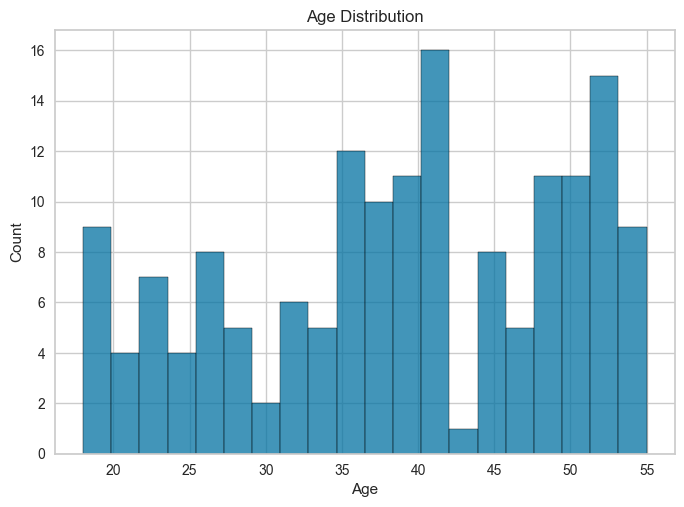

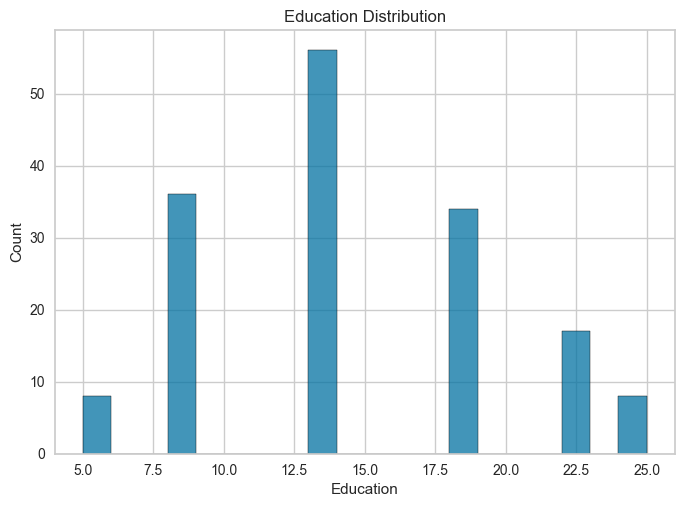

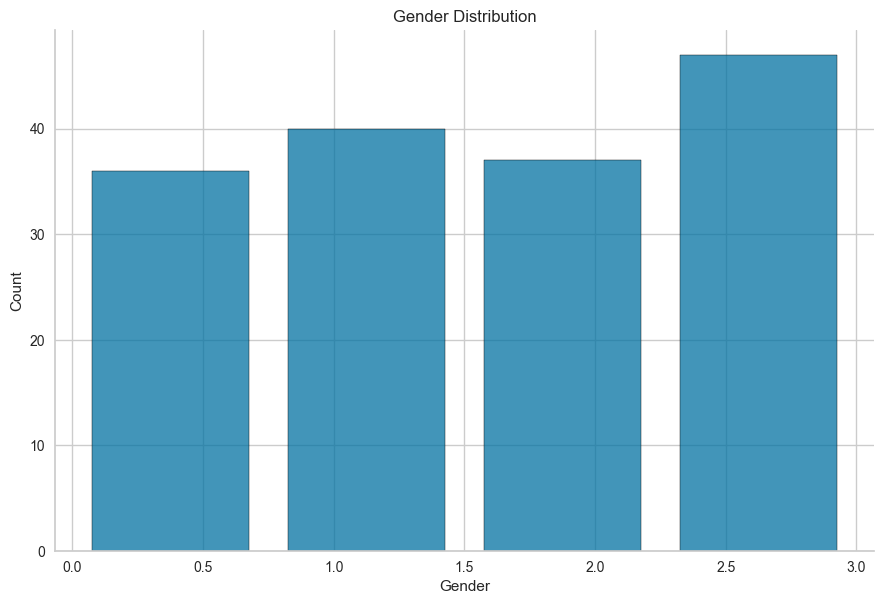

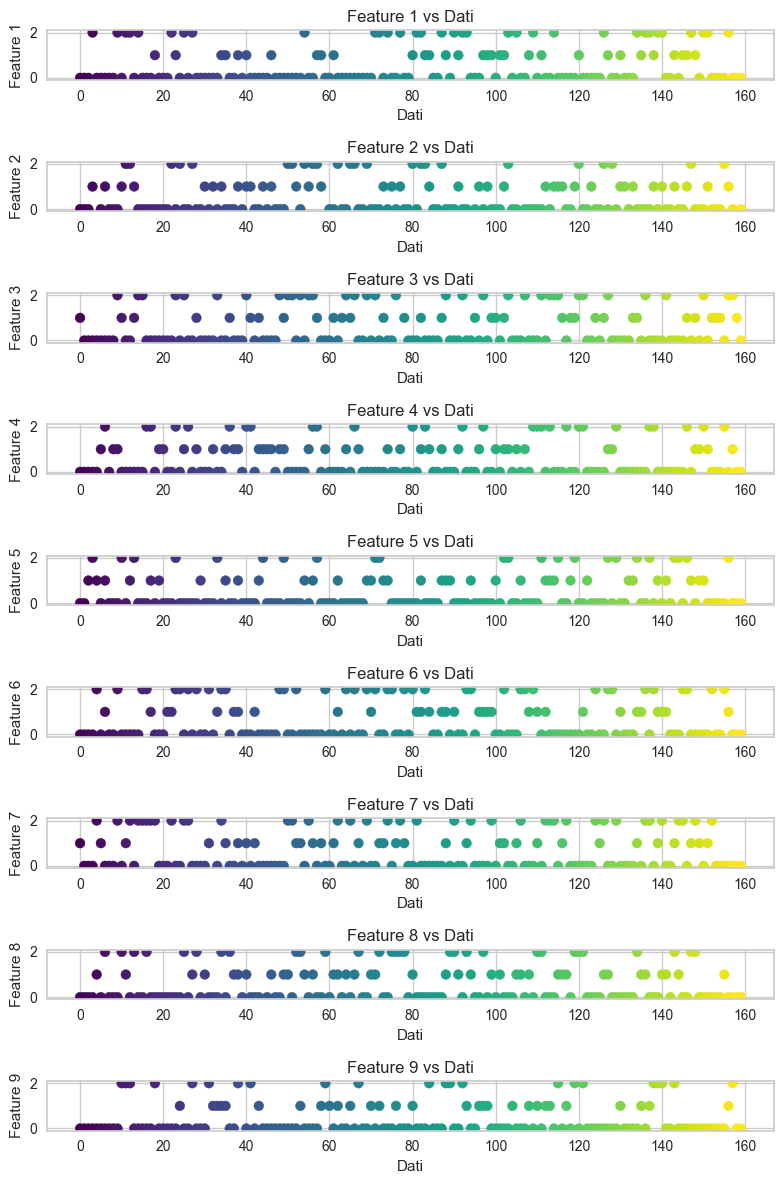

In [4]:
#Used to not display output

preparedData, dataFull = prepareData(data);

Run PCA on the data. It will run with 15 components.

In [3]:
preparedData

NameError: name 'preparedData' is not defined

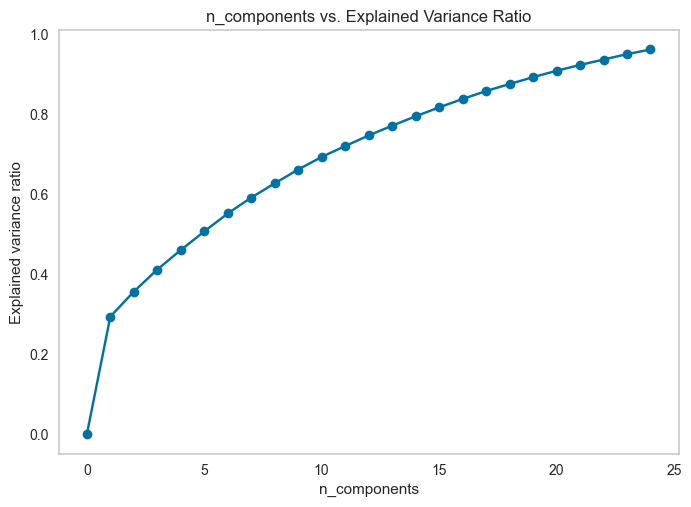

[0.29474995 0.06234537 0.05537982 0.04862339 0.04660465 0.04492899
 0.03961942 0.03579708 0.03441161 0.03156159 0.02719738 0.02653364
 0.02441449 0.02350603 0.02222214]
Total variance explained: 0.8178955523877042%


In [5]:

#Used to not display output

pcaScores, pca = runPCA(preparedData)

Clusterize data in 3 clusters

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.696252 -0.058483 -0.109618  0.412692 -0.266126 -0.133473  0.209482   
1 -1.156226 -0.619323  0.015368 -0.138811 -0.516230  0.055042 -0.013626   
2 -1.241237 -0.289453  0.036068  0.206310  0.021523  0.265252  0.776111   
3  1.570474 -0.304099  0.541693  0.052225 -0.205041  1.107589  0.762104   
4 -0.125902  0.792845 -0.660285 -0.615901  0.162167  0.014812  0.116008   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.060248  0.086425 -0.227214  0.002349 -0.018305  0.133755 -0.028044   
1 -0.100507 -0.094923  0.207117 -0.186098  0.228295 -0.255774 -0.292113   
2  0.222130 -0.308566  0.304478  0.274685 -0.381001 -0.233453 -0.040599   
3  0.464684 -0.225188  0.424060  0.152924  0.164826 -0.132598  0.212709   
4 -0.785030  0.837183 -0.143150  0.162262  0.357453 -0.275960  0.420940   

       PC15  kmeans labels  
0  0.040078              1  
1  0.223682              1  
2 -0.461063

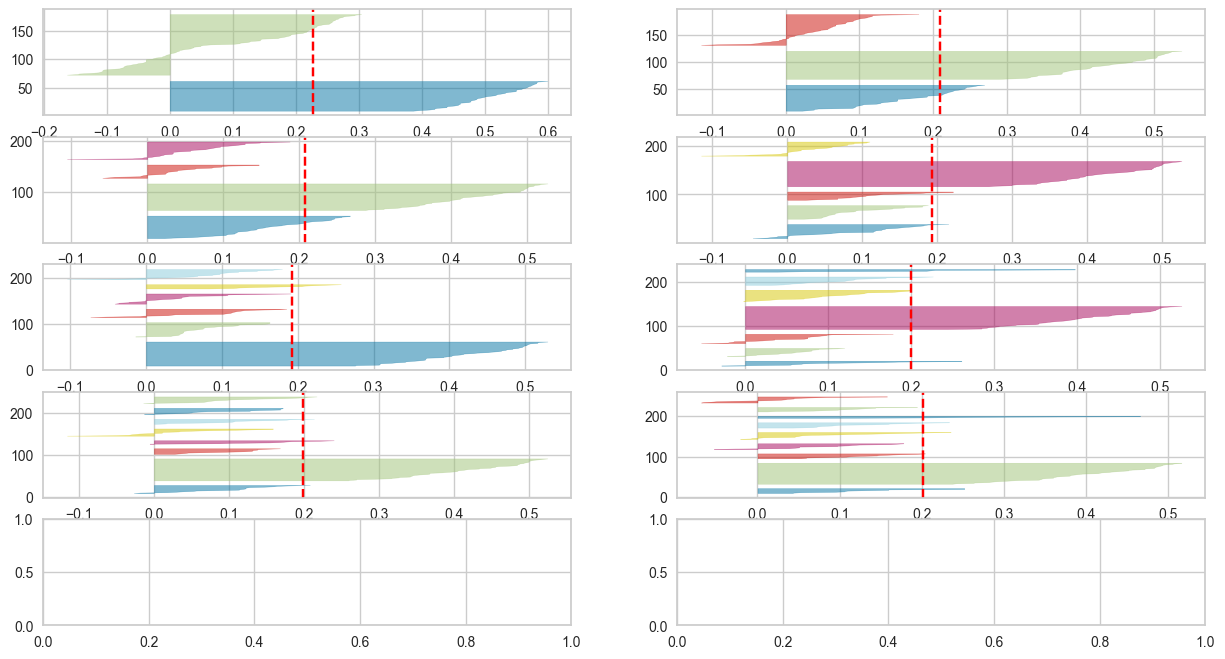

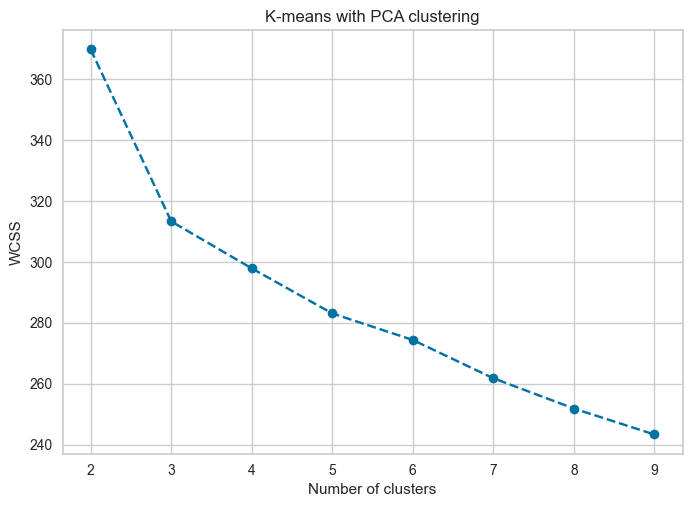

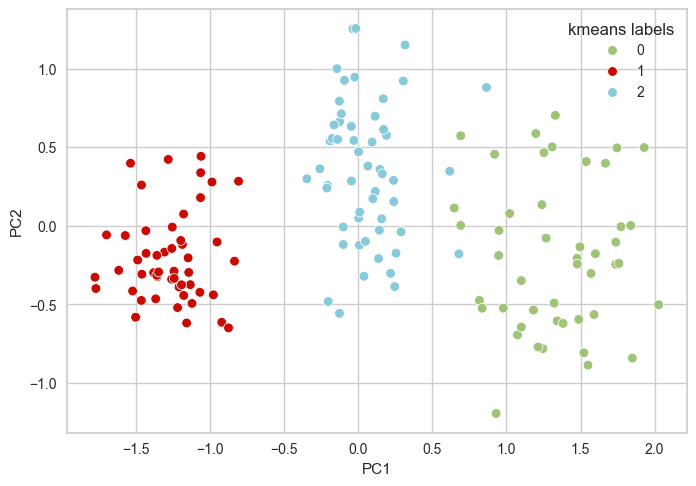

In [6]:

#Used to not display output

km_sel = runClusterizer(pcaScores)

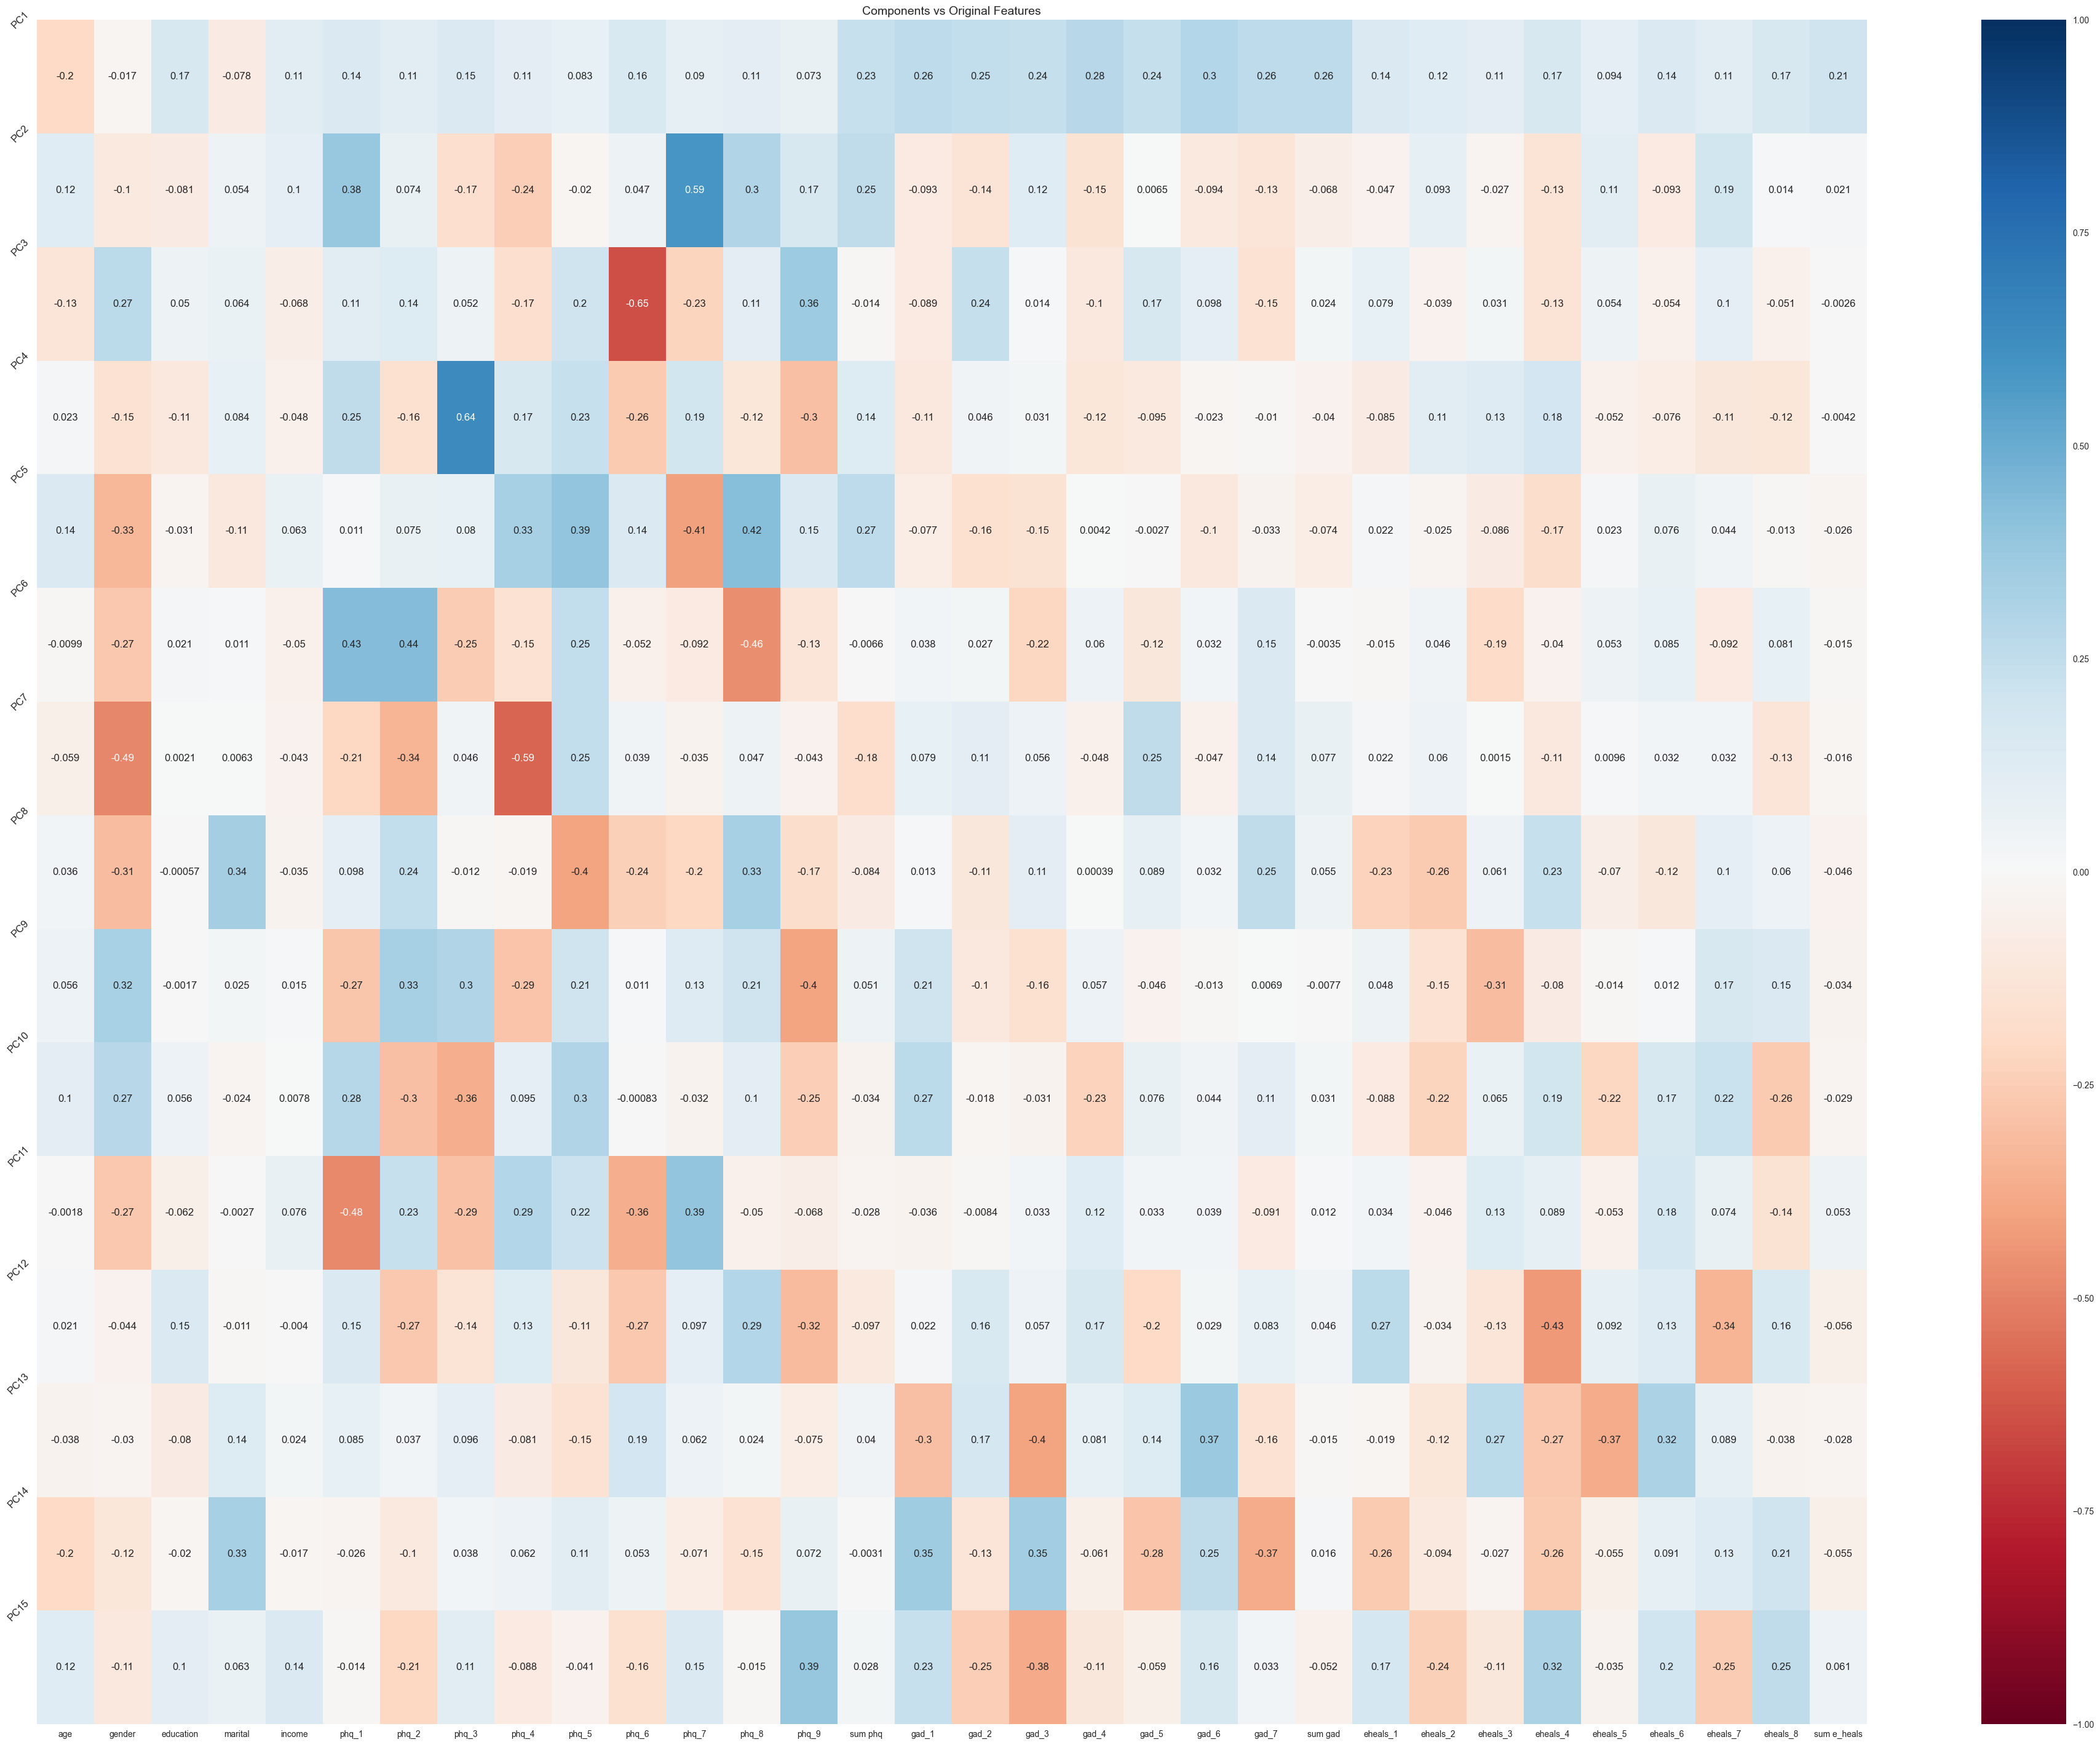

In [7]:
personasDataframe = clustersToPersonas(pca, pcaScores, dataFull, km_sel)

In [8]:
personasDataframe

age  gender  education  marital   income  phq_1  phq_2  \
Segment K-means PCA                                                            
0                    26.0     1.0       18.0      0.0  33000.0    1.0    1.0   
1                    45.0     2.0        8.0      2.0  20000.0    0.0    0.0   
2                    43.0     2.0       13.0      1.0  33000.0    0.0    0.0   

                     phq_3  phq_4  phq_5  ...  sum gad  eheals_1  eheals_2  \
Segment K-means PCA                       ...                                
0                      1.0    1.0    0.0  ...     16.0       5.0       5.0   
1                      0.0    0.0    0.0  ...      2.0       3.0       4.0   
2                      0.0    0.0    0.0  ...      7.0       4.0       5.0   

                     eheals_3  eheals_4  eheals_5  eheals_6  eheals_7  \
Segment K-means PCA                                                     
0                         5.0       5.0       5.0       5.0       5.0   
1                         3.0       3.0       4.0       3.0       3.0   
2                         4.0       5.0       5.0       4.0       5.0   

                     eheals_8  sum e_heals  
Segment K-means PCA                         
0                         5.0         36.0  
1                         3.0         23.0  
2                         4.0         30.0  

[3 rows x 32 columns]